In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=6, micro=3, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.17.4
pandas 0.25.3
sklearn 0.21.3
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


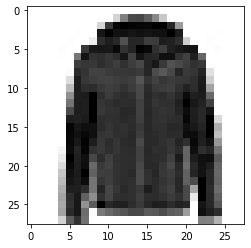

In [11]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()

show_single_image(x_train[0])

In [12]:
print(np.max(x_train), np.min(x_train))

255 0


In [13]:
# x = (x - u) / std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)


In [14]:
print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136


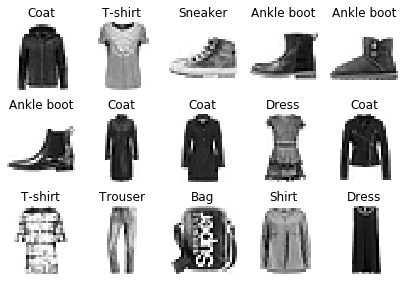

In [15]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col 
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary",
                       interpolation = 'nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)

In [16]:
# tf.keras.models.Sequential()

"""
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
"""

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3], 
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y->index. y->one_hot->[] 
# 类别，交叉熵损失函数
# 构建图
model.compile(loss="sparse_categorical_crossentropy",
#               optimizer = "sgd",
              optimizer = "adam",
              metrics = ["accuracy"])

In [17]:
model.layers

In [18]:
# 打出模型架构
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
# [None, 784] * W + b -> [None, 300] W.shape [784, 300], b = [300]

In [20]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 112us/sample - loss: 2.2171 - accuracy: 0.7003 - val_loss: 0.7351 - val_accuracy: 0.7464
Epoch 2/10
55000/55000 [==============================] - 5s 100us/sample - loss: 0.6198 - accuracy: 0.7833 - val_loss: 0.5882 - val_accuracy: 0.7960
Epoch 3/10
55000/55000 [==============================] - 5s 100us/sample - loss: 0.5008 - accuracy: 0.8228 - val_loss: 0.5030 - val_accuracy: 0.8260
Epoch 4/10
55000/55000 [==============================] - 6s 103us/sample - loss: 0.4553 - accuracy: 0.8379 - val_loss: 0.4542 - val_accuracy: 0.8504
Epoch 5/10
55000/55000 [==============================] - 6s 109us/sample - loss: 0.4218 - accuracy: 0.8506 - val_loss: 0.4119 - val_accuracy: 0.8564
Epoch 6/10
55000/55000 [==============================] - 6s 103us/sample - loss: 0.4085 - accuracy: 0.8567 - val_loss: 0.4931 - val_accuracy: 0.8460
Epoch 7/10
55000/55000 [===========================

In [21]:
type(history)

tensorflow.python.keras.callbacks.History

In [22]:
history.history

{'accuracy': [0.70025456,
  0.7833273,
  0.8228,
  0.8378909,
  0.8506182,
  0.8566545,
  0.86309093,
  0.86856365,
  0.8717273,
  0.8754182],
 'loss': [2.2171079459450462,
  0.6197585828867825,
  0.5007904631462964,
  0.4553095556302504,
  0.42179046923897484,
  0.4084634082967585,
  0.39055942668589677,
  0.37247281217791817,
  0.36319886869733986,
  0.3588568940942938],
 'val_accuracy': [0.7464,
  0.796,
  0.826,
  0.8504,
  0.8564,
  0.846,
  0.8514,
  0.8642,
  0.872,
  0.8674],
 'val_loss': [0.7350870084762573,
  0.588173157787323,
  0.5029528794527054,
  0.45421940400600436,
  0.4118567481994629,
  0.4931217332959175,
  0.463525070810318,
  0.416417928814888,
  0.37263246591091154,
  0.39420015896558763]}

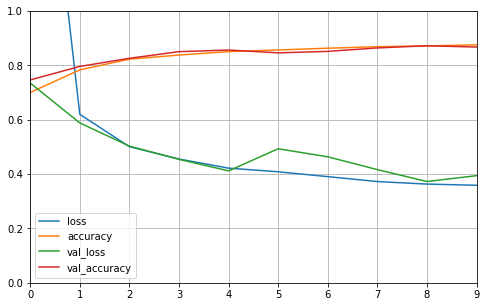

In [23]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [24]:
model.evaluate(x_test_scaled,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[3.9881817768096925, 0.2274]